In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def eucDist(x1, x2):
  return float(np.sqrt(np.sum((x1-x2)**2)))

# Building the KNN Class

In [2]:
class knnManual:

  def __init__(self,k,X,y):
    self.k = k
    self.X = X
    self.y = y


  def getDists(self,point):
    numEntries = self.X.shape[0]
    self.dists = np.zeros((numEntries))

    for i in range(0, numEntries):
        dist = eucDist(self.X[i,:],point)
        self.dists[i] = dist

    return self.dists         #array containing distances b/w point of interest and all points in X

  def predict(self,point):

    #combine the distances array and the y array, which we'l then sort and pick the top k from.
    #this new arr will have elements like ['dist 1', 'y 1'], ['dist 2', ' y 2']

    dists = self.getDists(point)
    self.combinedArr = np.column_stack((dists, self.y))

    indices = np.argsort((self.combinedArr[:,0]).astype(float))
    self.combinedArr = self.combinedArr[indices][:]   #sort this ['dist', 'y'] array based on distances
    kNearestNeighbors = self.combinedArr[0:self.k,1]  #pick y elements of the k closest entries from the combinedArr

    unique, frequency = np.unique(kNearestNeighbors, return_counts=True)   #unique y terms and their frequencies
    indexOfMaxFreq = np.argmax(frequency)  #index of highest frequency element


    return unique[indexOfMaxFreq]    # the highest frequency element (for classification)

    '''
    EXAMPLE :

      unique = ['a','b','c']
      frequency = [1,2,3]
      indexOfMaxFreq = 2
      unique[indexOfMaxFreq] = unique[2] = 'c'

    '''

# Testing on a simple, toy dataset

In [5]:

a = np.array([1,1,1,1,1])
b = np.array([1,1,1,2,1])

eucDist(a,b)   #testing eucDist function - works yay!


1.0

In [9]:

XtrialArrKnn = np.array([[10,9],[1,2],[19,20],[7,6],[3,4],[4,0],[5,6],[5,15],[12,1],[6,11],[6,8],[7,11],[9,9],[10,5]])
ytrialArrKnn = np.array(['a','b','c','a','a','b','b','a','c','a','c','c','a','b'])
TestpointTrialKnn = np.array([2,1])

knn = knnManual(2,XtrialArrKnn,ytrialArrKnn)
knn.predict(TestpointTrialKnn)


np.str_('b')

# **TRAINING AND TESTING ON THE (FAMOUS) IRIS DATASET**

In [ ]:
df = pd.read_csv('IRIS.xls')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X  = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split   #sklearn only for train test split, hey this does not count as cheating, the core knn logic uses only numpy :)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=36)


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
knn = knnManual(3,X_train,y_train)   # The way the class is written, the "learning" happens during the object creation phase. We have to pass in Xtrain and Ytrain during the object creation phase, we could've instead defined a fit function, but hey, this works and has one step less :)

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
#knn.predict(np.array([1,1,1,1]))

In [ ]:
y_pred = []
for i in range(0,len(X_test)):
  y_pred.append(knn.predict(X_test[i,:]))

predVsReal = pd.DataFrame(y_pred,columns = ['Predicted'])
predVsReal['Real'] = y_test
#predVsReal

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9833333333333333

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
dfNew = pd.DataFrame(X_test,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
dfNew['Predicted'] = y_pred
dfNew['Real'] = y_test

dfNew.head()


,sepal_length,sepal_width,petal_length,petal_width,Predicted,Real
0,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor
1,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
2,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
3,7.7,2.6,6.9,2.3,Iris-virginica,Iris-virginica
4,7.7,2.8,6.7,2.0,Iris-virginica,Iris-virginica


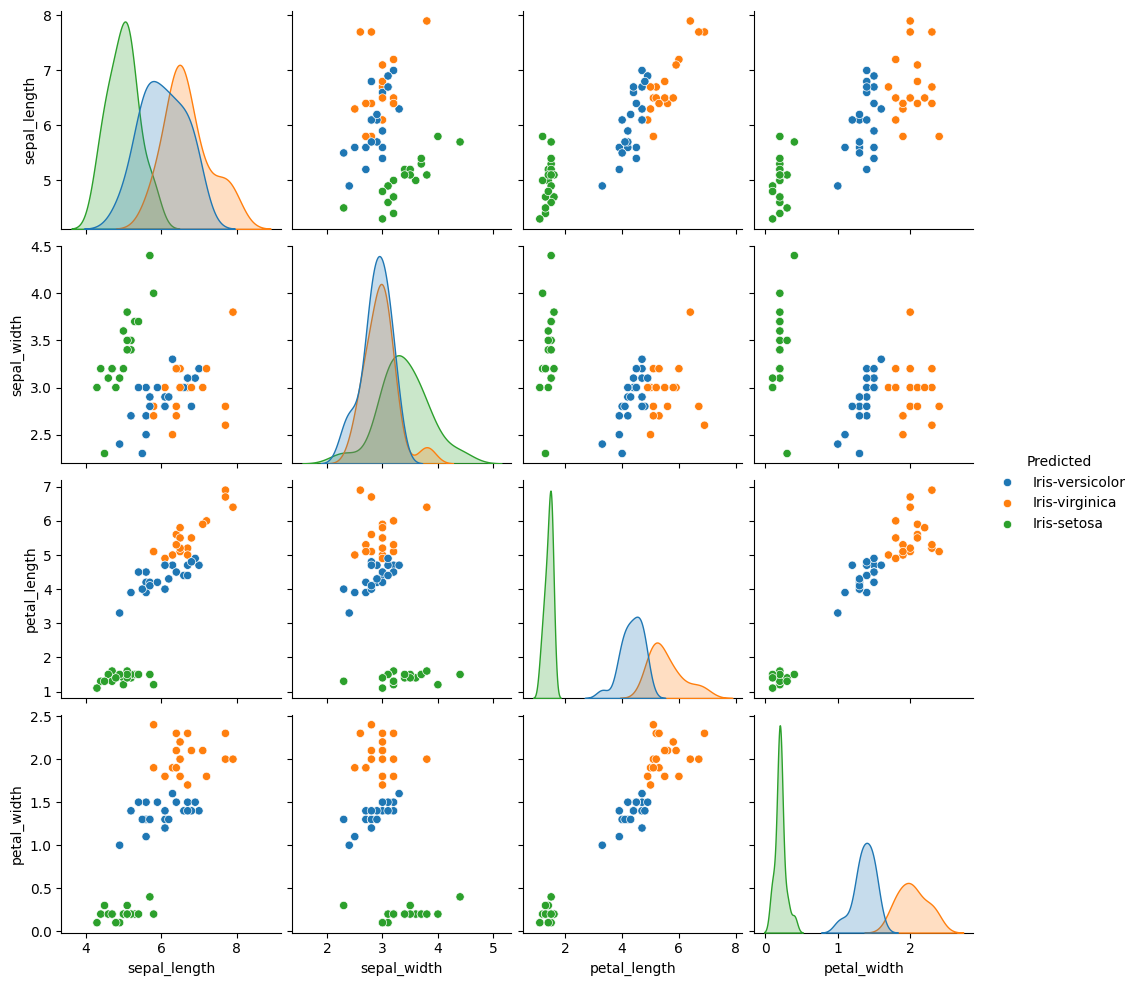

In [ ]:
sns.pairplot(dfNew,hue='Predicted')

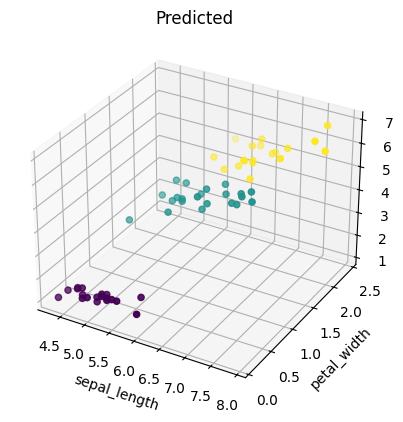

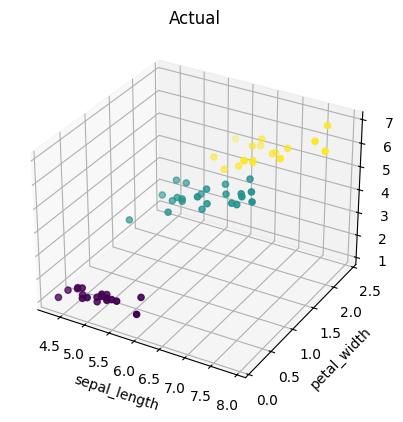

In [ ]:
ax = plt.axes(projection = '3d')

color_vals = dfNew['Predicted'].astype('category').cat.codes

ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('petal_length')
ax.scatter3D(dfNew['sepal_length'],dfNew['petal_width'],dfNew['petal_length'],c = color_vals)
ax.set_title('Predicted')
plt.show()


ax2 = plt.axes(projection = '3d')

color_vals2 = dfNew['Real'].astype('category').cat.codes

ax2.set_xlabel('sepal_length')
ax2.set_ylabel('petal_width')
ax2.set_zlabel('petal_length')
ax2.scatter3D(dfNew['sepal_length'],dfNew['petal_width'],dfNew['petal_length'],c = color_vals2)
ax2.set_title('Actual')
plt.show()

<Axes: >

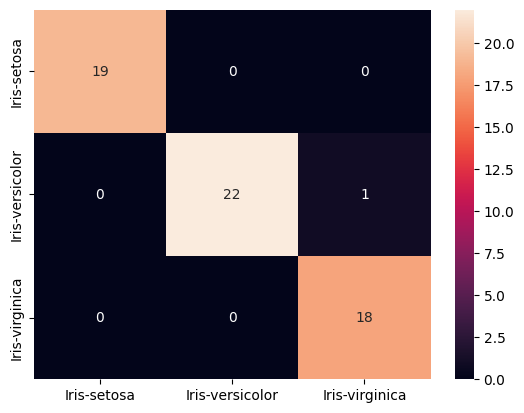

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True, xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
#

In [ ]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y_test,y_pred,average=None))
print(precision_score(y_test,y_pred,average=None))


[1.         0.95652174 1.        ]
[1.         1.         0.94736842]
